C:\Users\REDMI\AppData\Local\Temp\ipykernel_15064\292393638.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='value', hue='month', data=df_bar,


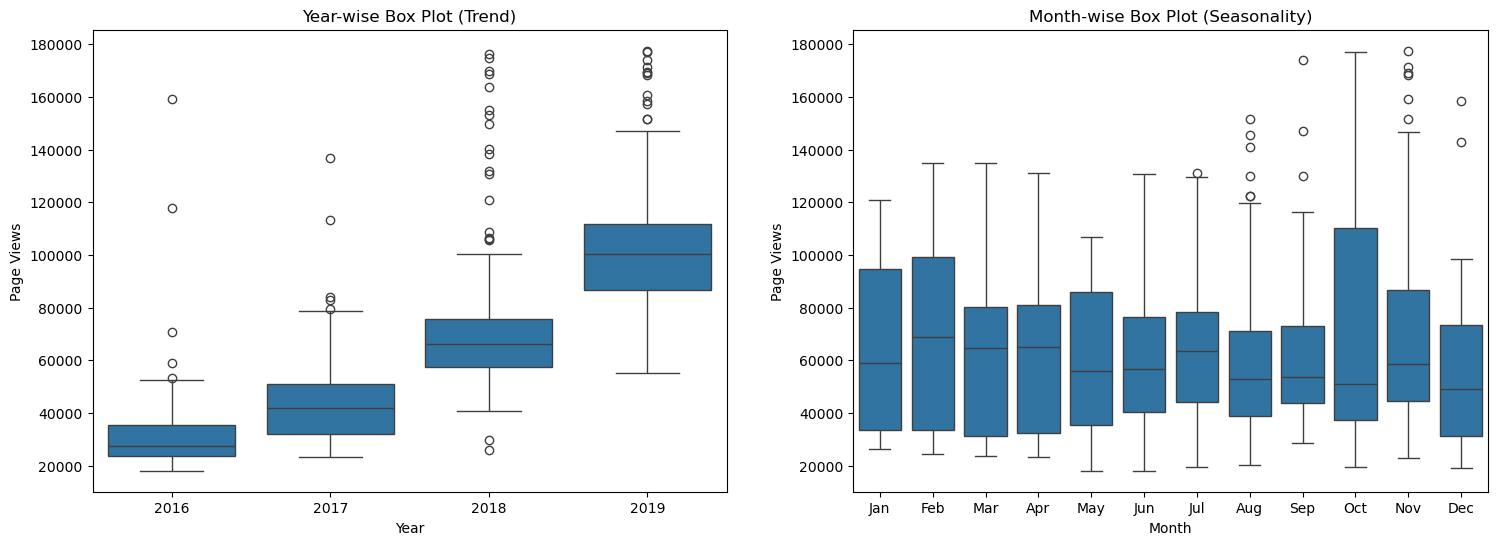

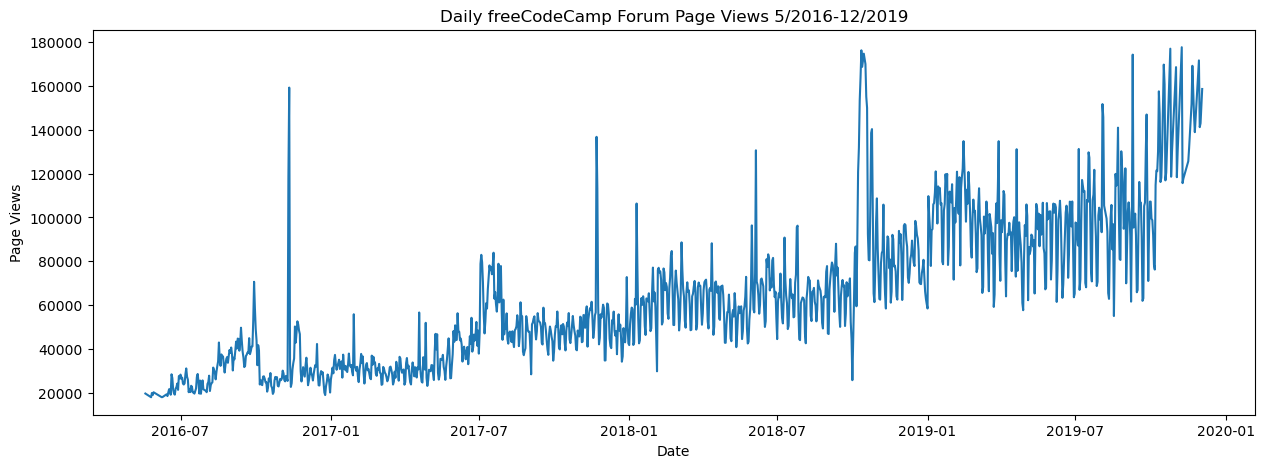

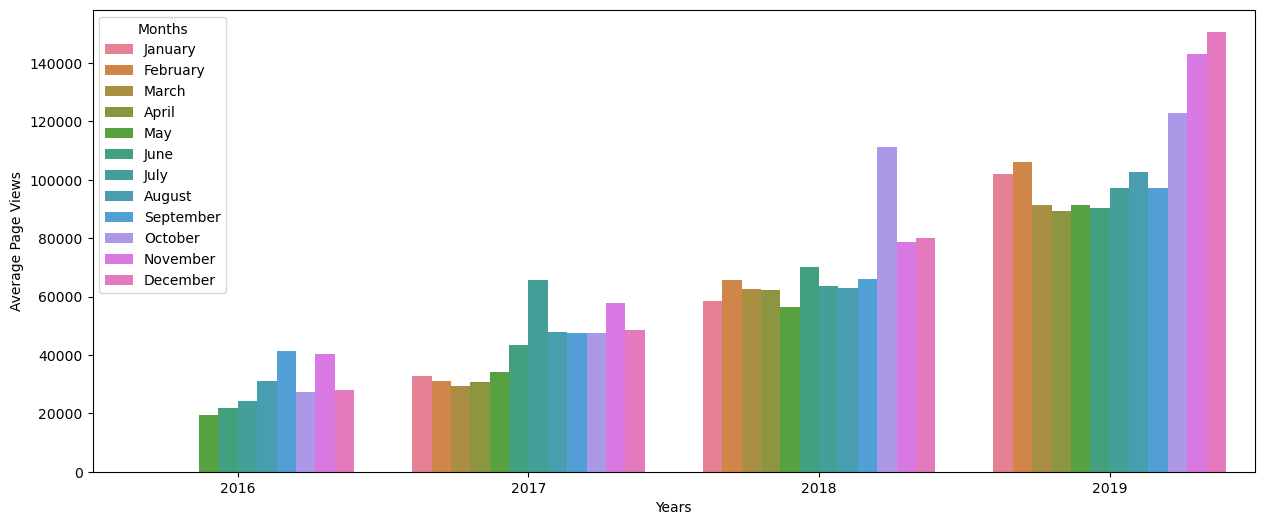

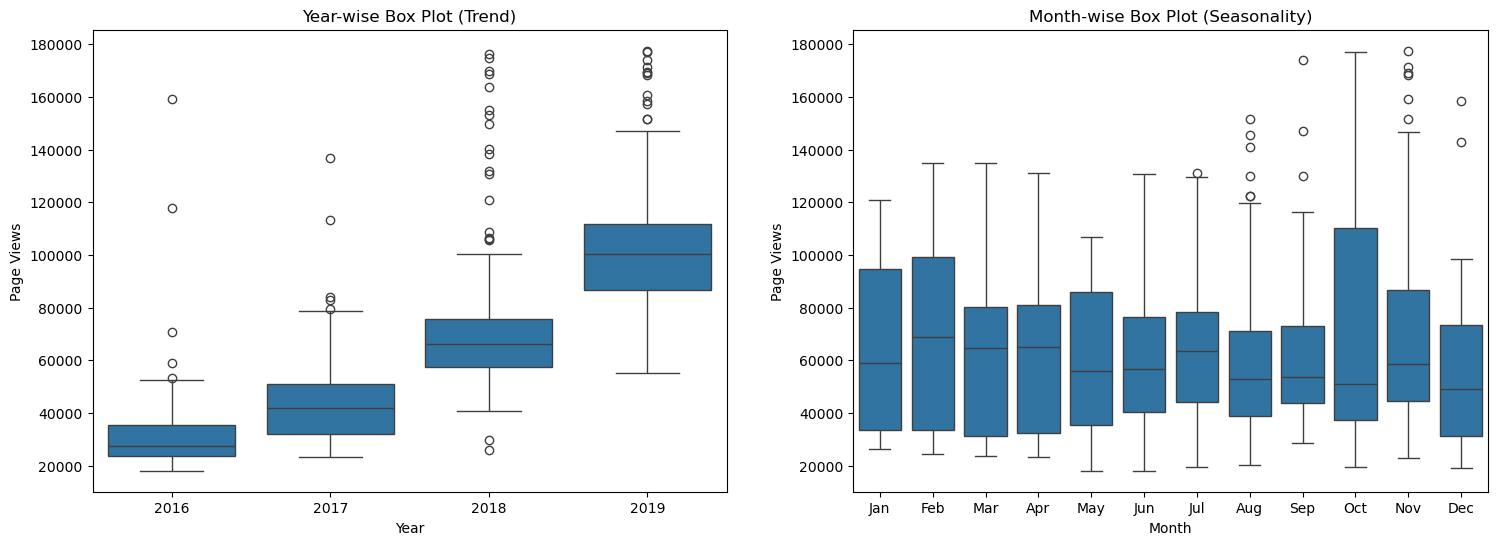

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)


df = df[df["value"].between(df["value"].quantile(0.025), df["value"].quantile(0.975))]


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']


def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(data=df, legend=False)
    ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019',
           xlabel='Date', ylabel='Page Views')
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    fig, ax = plt.subplots(figsize=(15, 6))
   sns.barplot(x='year', y='value', hue='month', data=df_bar, hue_order=months, errorbar=None)

    ax.set(xlabel='Years', ylabel='Average Page Views')
    ax.legend(title='Months')
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['monthnumber'] = df_box['date'].dt.month
    df_box = df_box.sort_values('monthnumber')

    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=ax[0])
    ax[0].set(title='Year-wise Box Plot (Trend)', xlabel='Year', ylabel='Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=ax[1])
    ax[1].set(title='Month-wise Box Plot (Seasonality)', xlabel='Month', ylabel='Page Views')

    fig.savefig('box_plot.png')
    return fig



draw_line_plot()
draw_bar_plot()
draw_box_plot()

